In [1]:
import pandas as pd
import numpy as np

In [2]:
match_data = pd.read_csv("matches.csv",index_col= 0)

In [3]:
match_data.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [4]:
match_data.tail()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,Match Report,NaN,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,Match Report,NaN,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,Match Report,NaN,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,Match Report,NaN,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United
42,2021-05-23,16:00,Premier League,Matchweek 38,Sun,Home,W,1.0,0.0,Burnley,...,Match Report,NaN,12.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United


In [5]:
match_data.shape

(1389, 27)

In [6]:
# عندنا 38 ماتش ف الموسم وكمان عدد الفرق المشاركه بيكون 20 فريق وانا من بصتى للداتا شوفت اننا عندنا موسمين 2022 و2021   
number_match = 38 * 20 * 2
print(f"number of matchs in two season is {number_match}")

number of matchs in two season is 1520


In [7]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 1 to 42
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1389 non-null   object 
 1   time          1389 non-null   object 
 2   comp          1389 non-null   object 
 3   round         1389 non-null   object 
 4   day           1389 non-null   object 
 5   venue         1389 non-null   object 
 6   result        1389 non-null   object 
 7   gf            1389 non-null   float64
 8   ga            1389 non-null   float64
 9   opponent      1389 non-null   object 
 10  xg            1389 non-null   float64
 11  xga           1389 non-null   float64
 12  poss          1389 non-null   float64
 13  attendance    693 non-null    float64
 14  captain       1389 non-null   object 
 15  formation     1389 non-null   object 
 16  referee       1389 non-null   object 
 17  match report  1389 non-null   object 
 18  notes         0 non-null      

In [11]:
# we should have 39 match every team 
match_data["round"].value_counts()

Matchweek 1     39
Matchweek 16    39
Matchweek 34    39
Matchweek 32    39
Matchweek 31    39
Matchweek 29    39
Matchweek 28    39
Matchweek 26    39
Matchweek 25    39
Matchweek 24    39
Matchweek 23    39
Matchweek 2     39
Matchweek 19    39
Matchweek 17    39
Matchweek 20    39
Matchweek 15    39
Matchweek 5     39
Matchweek 3     39
Matchweek 13    39
Matchweek 12    39
Matchweek 4     39
Matchweek 11    39
Matchweek 10    39
Matchweek 9     39
Matchweek 8     39
Matchweek 14    39
Matchweek 7     39
Matchweek 6     39
Matchweek 30    37
Matchweek 27    37
Matchweek 22    37
Matchweek 21    37
Matchweek 18    37
Matchweek 33    32
Matchweek 35    20
Matchweek 36    20
Matchweek 37    20
Matchweek 38    20
Name: round, dtype: int64

## cleaning data

In [12]:
# convert date column from object to Numerical 
match_data["date"] = pd.to_datetime(match_data["date"])

In [52]:
# add new column as Numerical datatype refer opponent object ------> every team have unique code
match_data["opponent_code"] = match_data["opponent"].astype("category").cat.codes

In [33]:
# add new column as Numerical datatype refer venue object ------> Home :1, Away : 0
match_data["venue_code"] = match_data["venue"].astype("category").cat.codes

In [34]:
# convert time columns to hour only without minutes
match_data["hour"] = match_data["time"].str.replace(":.+", "", regex=True).astype("int")

In [35]:
# convert day name to Numerical number start monday----> 0,....
match_data["day_code"] = match_data["date"].dt.dayofweek

In [36]:
# convert result column to Numerical (loss,drow_-----> 0 and win----> 1
match_data["target"] = (match_data["result"] == "W").astype("int")

In [38]:
# drop same columns
match_data.drop(columns= ["notes","match report","captain"],inplace= True)

## Target of my Model (Team Won or Not)

In [39]:
# RandomForestClassifier is type of machine learning modelpic up non-linear data  
from sklearn.ensemble import RandomForestClassifier

In [40]:
# create object 
model = RandomForestClassifier(n_estimators = 50, min_samples_split = 10, random_state = 1)

In [41]:
# train model 
train = match_data[match_data["date"] < '2022-01-01'] 

In [42]:
test = match_data[match_data["date"] > '2022-01-01']

In [54]:
predictors = ["venue_code", "opponent_code", "hour", "day_code"] # as axis 

In [55]:
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [56]:
prediction = model.predict(test[predictors])

## determine the accuracy of model

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [58]:
Y = test["target"]
accurcy = accuracy_score(Y, prediction)
cf_matrix = confusion_matrix(Y, prediction)

In [59]:
# show precentage of accurate 
accurcy

0.6123188405797102

In [63]:
# combine acual value with predicted value
combined = pd.DataFrame(dict(actual=test["target"], predicted = prediction))
combined

,actual,predicted
31,1,0
32,0,0
34,1,0
35,1,1
37,0,1
...,...,...
33,0,0
34,0,0
35,1,0
36,0,0


<Axes: >

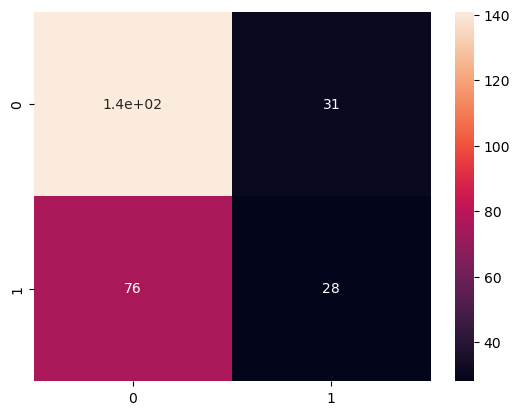

In [64]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)